# Top Music Predictor - K-Nearest Neighbour
___

Dataset: 

Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance


sb.set()

Extracting the data from spotify-2023.csv

In [48]:
music_data = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

Cleaning the data to only have the required labels

In [49]:
required_labels = ["track_name", "streams", "danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "speechiness_%"]

music_data_clean = music_data[required_labels]

music_data_clean = music_data_clean.drop_duplicates(subset=['track_name']).reset_index(drop=True)

Modifying the data to classify boundries based on streams

In [50]:
# Define the class boundaries based on streams
def categorize_popularity(row):
    max_streams = music_data_clean['streams'].max()
    if row['streams'] < max_streams * 0.05: 
        return 0  # Low popularity
    elif max_streams * 0.05 <= row['streams'] < max_streams * 0.2:
        return 1  # Moderate popularity
    elif max_streams * 0.2 <= row['streams'] < max_streams * 0.4:
        return 2  # High popularity
    else:
        return 3  # Very high popularity

# Apply the function to create a 'popularity_class' column
music_data_clean['popularity_class'] = music_data_clean.apply(categorize_popularity, axis=1)

music_data_clean

,track_name,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,speechiness_%,popularity_class
0,Seven (feat. Latto) (Explicit Ver.),141381703,80,89,83,31,0,4,0
1,LALA,133716286,71,61,74,7,0,4,0
2,vampire,140003974,51,32,53,17,0,6,0
3,Cruel Summer,800840817,55,58,72,11,0,15,2
4,WHERE SHE GOES,303236322,65,23,80,14,63,6,1
...,...,...,...,...,...,...,...,...,...
937,The Great War,181382590,57,55,74,22,0,4,0
938,My Mind & Me,91473363,60,24,39,57,0,3,0
939,Bigger Than The Whole Sky,121871870,42,7,24,83,1,6,0
940,A Veces (feat. Feid),73513683,80,81,67,4,0,6,0


Splitting the data to classify

In [51]:
# Features and target variable
X = music_data_clean[required_labels[2:]]  # Excluding the 'track_name' and 'streams' columns
y = music_data_clean['popularity_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Using a model to predict if the song will  be a hit or not

In [52]:
# scale data since we're working with KNN
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)
scaled_df_train = pd.DataFrame(scaled_data_train, columns = X_train.columns)
scaled_df_test = pd.DataFrame(scaled_data_test, columns = X_test.columns)

# Initialize and train the KNN Classifier
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.4576271186440678
Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.35      0.38        81
           1       0.49      0.73      0.59       109
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        11

    accuracy                           0.46       236
   macro avg       0.23      0.27      0.24       236
weighted avg       0.37      0.46      0.40       236



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Visualisation of code

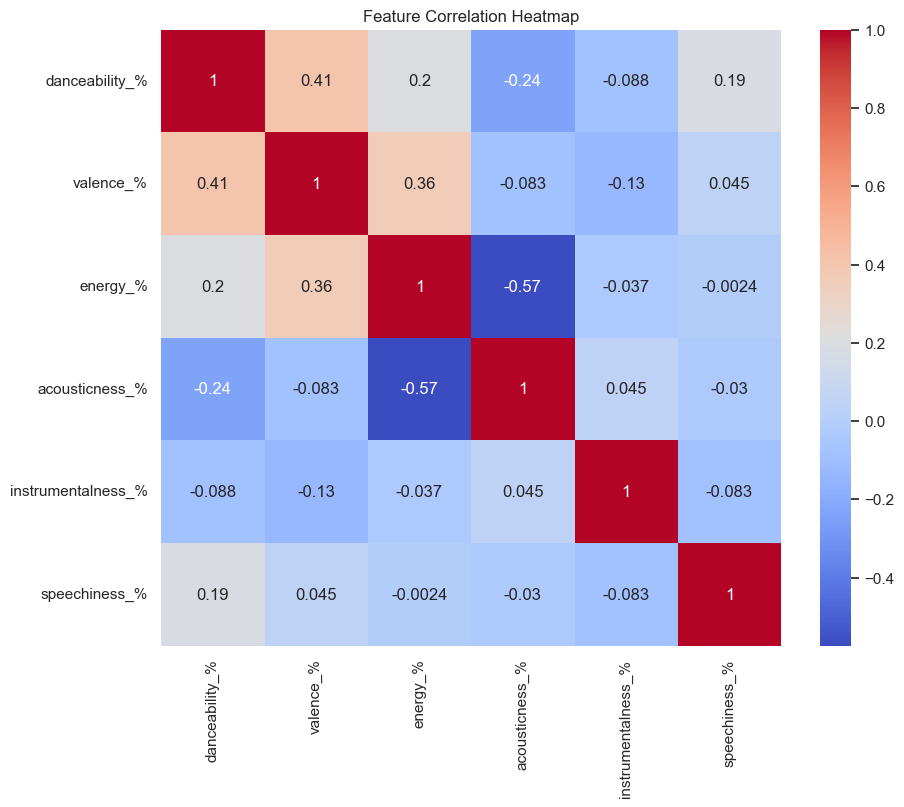

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

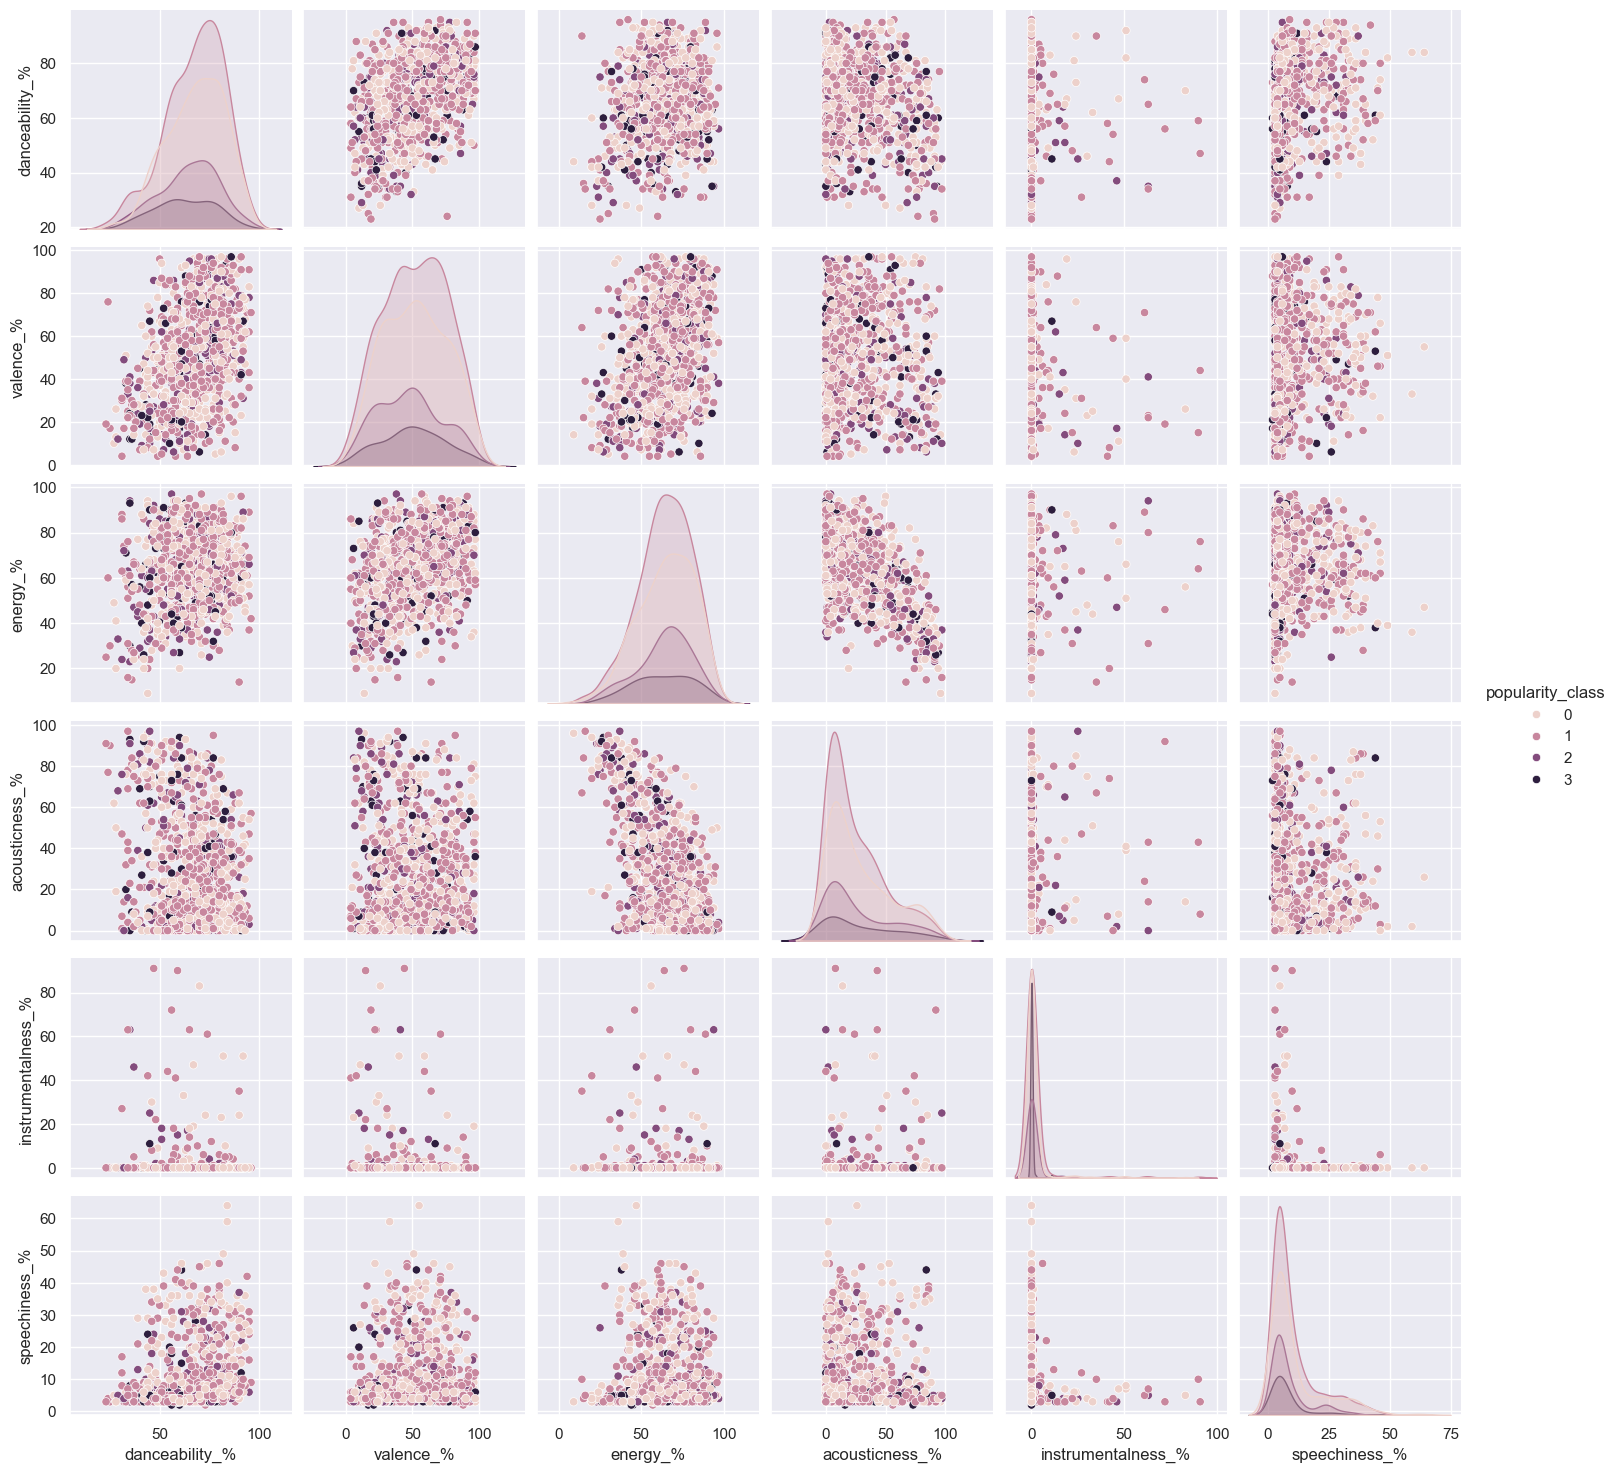

In [54]:
sns.pairplot(music_data_clean, hue='popularity_class', vars=required_labels[2:])
plt.show()

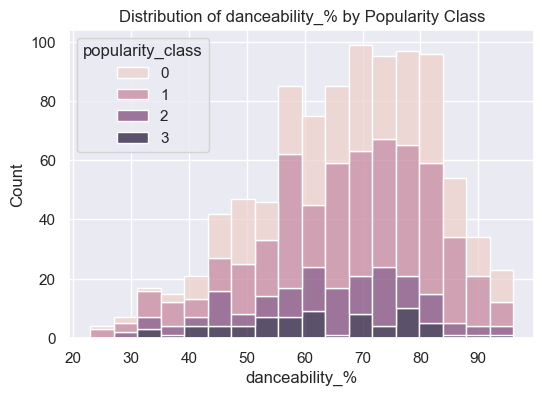

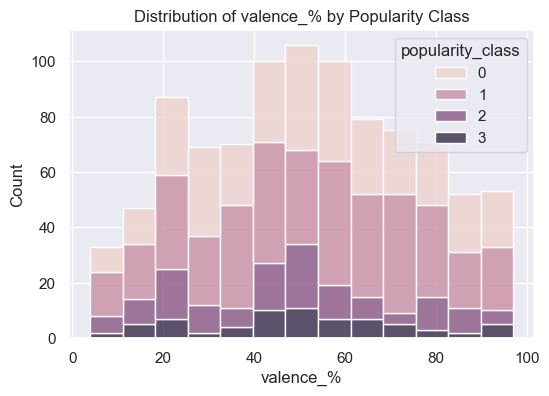

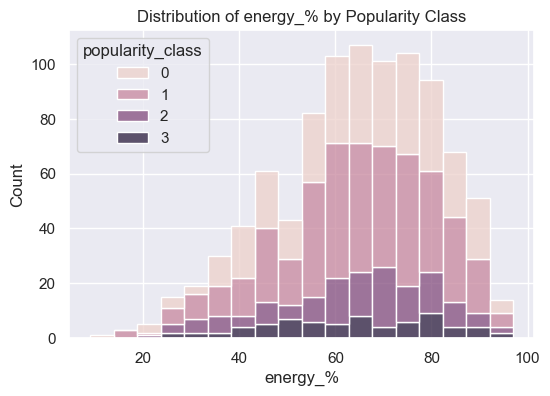

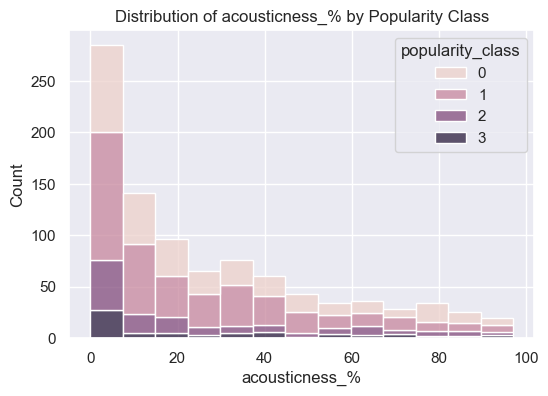

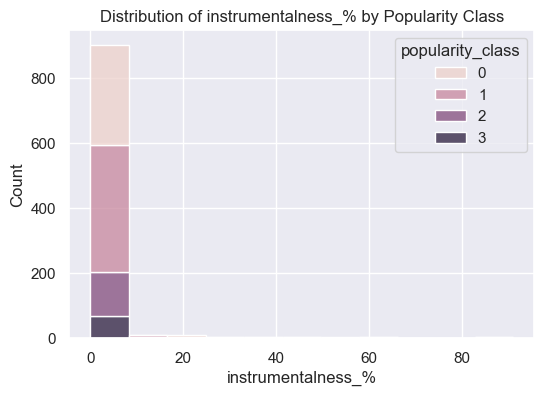

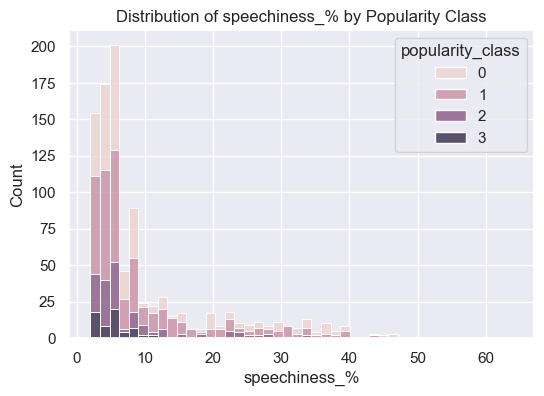

In [55]:
for col in required_labels[2:]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=music_data_clean, x=col, hue="popularity_class", multiple="stack")
    plt.title(f'Distribution of {col} by Popularity Class')
    plt.show()

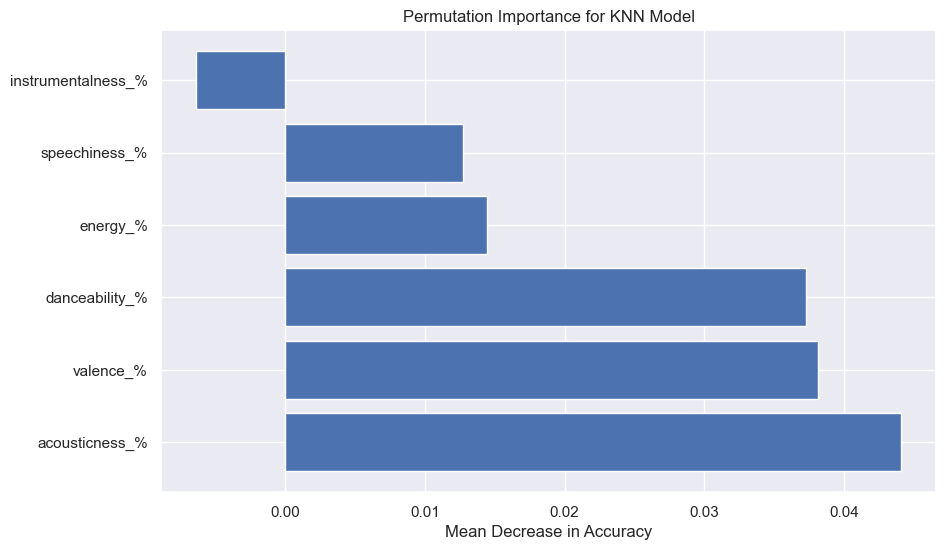

In [56]:
# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Plotting feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Permutation Importance for KNN Model')
plt.xlabel('Mean Decrease in Accuracy')
plt.show()

Input a song's stream and features to check if it is a hit or not

In [57]:
def predict_popularity_percentage():
    print("Enter the features of the song (excluding streams):")
    
    # Input features from the user (excluding 'streams')
    danceability = float(input("Danceability (%): "))
    valence = float(input("Valence (%): "))
    energy = float(input("Energy (%): "))
    acousticness = float(input("Acousticness (%): "))
    instrumentalness = float(input("Instrumentalness (%): "))
    speechiness = float(input("Speechiness (%): "))
    
    # Create a DataFrame for the new song (no 'streams' value)
    new_song = {
        'danceability_%': danceability,
        'valence_%': valence,
        'energy_%': energy,
        'acousticness_%': acousticness,
        'instrumentalness_%': instrumentalness,
        'speechiness_%': speechiness
    }
    new_song_df = pd.DataFrame([new_song])
    

    # Predict the popularity class for the new song
    popularity_class = model.predict(new_song_df)[0]
    
    # Map the class to a label
    category_labels = ['Low popularity', 'Moderate popularity', 'High popularity', 'Very high popularity']
    print(f"\nPredicted popularity category: {category_labels[popularity_class]}")

# Call the function to interact with the user
predict_popularity_percentage()

Enter the features of the song (excluding streams):

Predicted popularity category: Moderate popularity
